In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [5]:
# load data
horm_beh = np.load('../../data/processed/compounds_aligned_speed.npy', allow_pickle=True).item()
X1m = horm_beh['X1m'].T
X1a = horm_beh['X1a'].T
X2m = horm_beh['X2m'].T
X2a = horm_beh['X2a'].T
X3 = horm_beh['X3'].T
y1m = horm_beh['y1m']
y1a = horm_beh['y1a']
y2m = horm_beh['y2m']
y2a = horm_beh['y2a']
y3 = horm_beh['y3']
common_comps = horm_beh['common_comps']

In [6]:
# robust z-score for each individual animal first
def robust_zscore(data, axis=0, log_transform=False, exclude_outliers=False, z_transform=False):
    if log_transform:
        data = np.log(data)
    median = np.nanmedian(data, axis=axis)
    mad = np.nanmedian(np.abs(data - median), axis=axis)
    if z_transform:
        zscore = (data - median) / mad
    else:
        zscore = data - median
    if exclude_outliers:
        zscore[np.abs(zscore) > 3] = np.nan
    return zscore

X1 = robust_zscore(np.concatenate([X1m, X1a], axis=0), log_transform=False)
X2 = robust_zscore(np.concatenate([X2m, X2a], axis=0), log_transform=False)
X3 = robust_zscore(X3, log_transform=False)

y1 = np.concatenate([y1m, y1a], axis=0)
y2 = np.concatenate([y2m, y2a], axis=0)
y3 = y3

In [7]:
# concatenate data
X = np.concatenate([X1, X2, X3], axis=0)
y = robust_zscore(np.concatenate([y1m, y1a, y2m, y2a, y3], axis=0), log_transform=True, z_transform=False)
n_samples, n_features = X.shape

In [8]:
# correlate histamine and behavior
from scipy.stats import pearsonr
histamine_idx = common_comps.index('Histamine')
r, p = spearmanr(X[:, histamine_idx], y)
print(f'Correlation between Histamine and Behavior: r={r:.3f}, p={p:.3e}')

Correlation between Histamine and Behavior: r=0.590, p=1.113e-17


In [9]:
max_lag = 5

In [10]:
# spearman R cross correlation
def spearman_ccf(x, y, max_lag):
    lags = np.arange(-max_lag+1, max_lag)
    ccf = [spearmanr(x[max_lag+lag:-max_lag+lag], 
                     y[max_lag: -max_lag])[0] for lag in lags]
    return lags, ccf

<StemContainer object of 3 artists>

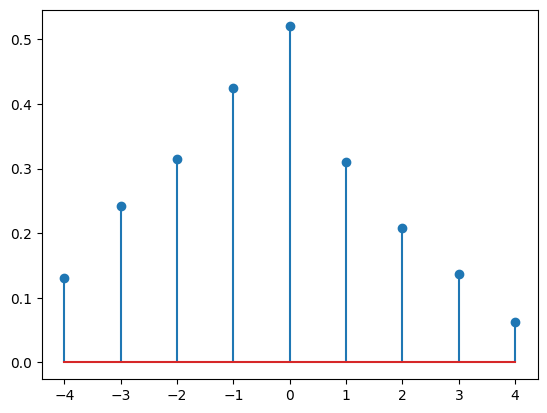

In [11]:
# compute cross correlaiton between histamine and histidine
histidine_idx = common_comps.index('Histidine')
histamine_idx = common_comps.index('Histamine')
lags, ccf_histamine_histidine = spearman_ccf(X[:, histamine_idx], X[:, histidine_idx],max_lag=5)
plt.figure()
plt.stem(lags, ccf_histamine_histidine)

Text(0, 0.5, 'Locomotion')

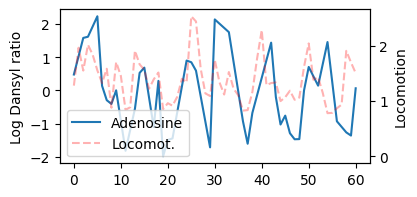

In [12]:
plt.figure(figsize=(4, 2))
adenosine_idx = common_comps.index('Adenosine')
plt.plot(X2[:, adenosine_idx], label='Adenosine')
plt.ylabel('Log Dansyl ratio')
plt.twinx()
plt.plot(0,0,label='Adenosine')
plt.plot(y2, c='red', alpha=0.3, ls='--', label='Locomot.')
plt.legend()
plt.xlabel('Sample # (7.5 min)')
plt.ylabel('Locomotion')
# # plt.savefig('adenosine_speed.pdf', dpi=300)

Text(0, 0.5, 'Locomotion')

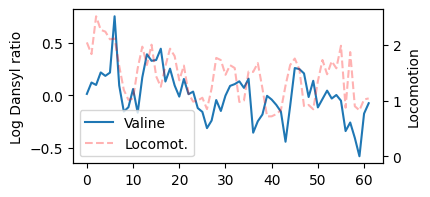

In [13]:
plt.figure(figsize=(4, 2))
creatine_idx = common_comps.index('Valine')
plt.plot(X3[:, creatine_idx], label='Valine')
plt.ylabel('Log Dansyl ratio')
plt.twinx()
plt.plot(0,0,label='Valine')
plt.plot(y3, c='red', alpha=0.3, ls='--', label='Locomot.')
plt.legend()
plt.xlabel('Sample # (7.5 min)')
plt.ylabel('Locomotion')
# # plt.savefig('valine_speed.pdf', dpi=300)

Text(0, 0.5, 'Locomotion')

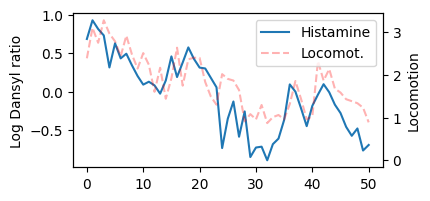

In [14]:
plt.figure(figsize=(4, 2))
histamine_idx = common_comps.index('Histamine')
plt.plot(X1[:, histamine_idx], label='Histamine')
plt.ylabel('Log Dansyl ratio')
plt.twinx()
plt.plot(0,0,label='Histamine')
plt.plot(y1, c='red', alpha=0.3, ls='--', label='Locomot.')
plt.legend()
plt.xlabel('Sample # (7.5 min)')
plt.ylabel('Locomotion')
# # plt.savefig('histamine_speed.pdf', dpi=300)

Text(0, 0.5, 'Locomotion')

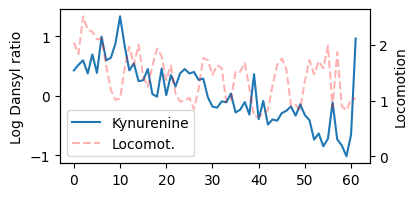

In [15]:
# plot N-formylkynurenine
plt.figure(figsize=(4, 2))
# nfk_idx = common_comps.index('N-formylkynurenine')
nfk_idx = common_comps.index('Kynurenine')
plt.plot(X3[:, nfk_idx], label='Kynurenine')
plt.ylabel('Log Dansyl ratio')
plt.twinx()
plt.plot(0,0,label='Kynurenine')
plt.plot(y3, c='red', alpha=0.3, ls='--', label='Locomot.')
plt.legend()
plt.xlabel('Sample # (7.5 min)')
plt.ylabel('Locomotion')
# # plt.savefig('kynurenine_speed.pdf', dpi=300)

In [16]:
def plot_ccf(idx):
    lags, ccf = spearman_ccf(X[:,idx],y,max_lag)
    plt.stem(np.array(lags*7.5), ccf)
    plt.xlabel('Lag (min)')
    plt.ylabel('Spearman R')
    plt.axvline(0, color='k', ls='--')
    plt.title(f'{common_comps[idx]}')

Text(0.5, 1.0, '')

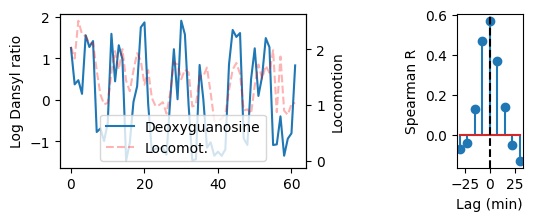

In [17]:
# plot deoxyguanonise
plt.figure(figsize=(7, 2))
plt.subplot(1,2,1)
deoxy_idx = common_comps.index('Deoxyguanosine')
plt.plot(X3[:, deoxy_idx], label='Deoxyguanosine')
plt.ylabel('Log Dansyl ratio')
plt.twinx()
plt.plot(0,0,label='Deoxyguanosine')
plt.plot(y3, c='red', alpha=0.3, ls='--', label='Locomot.')
plt.legend()
plt.xlabel('Sample # (7.5 min)')
plt.ylabel('Locomotion')
plt.subplot(176)
plot_ccf(deoxy_idx)
plt.title('')
# plt.tight_layout()

Text(0.5, 1.0, '')

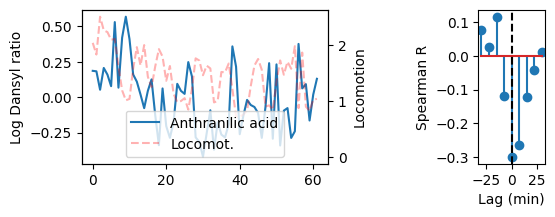

In [18]:
# plot anthranilic acid
plt.figure(figsize=(7, 2))
plt.subplot(1,2,1)
anthr_idx = common_comps.index('Anthranilic acid')
plt.plot(X3[:, anthr_idx], label='Anthranilic acid')
plt.ylabel('Log Dansyl ratio')
plt.twinx()
plt.plot(0,0,label='Anthranilic acid')
plt.plot(y3, c='red', alpha=0.3, ls='--', label='Locomot.')
plt.legend()
plt.xlabel('Sample # (7.5 min)')
plt.ylabel('Locomotion')
plt.subplot(176)
plot_ccf(anthr_idx)
plt.title('')
# # plt.savefig('anthranilic_acid_speed.pdf', dpi=300)

Text(0.5, 1.0, '')

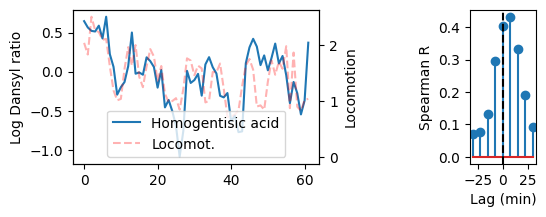

In [19]:
# homogentistic acid
plt.figure(figsize=(7, 2))
plt.subplot(1,2,1)
hga_idx = common_comps.index('Homogentisic acid')
plt.plot(X3[:, hga_idx], label='Homogentisic acid')
plt.ylabel('Log Dansyl ratio')
plt.twinx()
plt.plot(0,0,label='Homogentisic acid')
plt.plot(y3, c='red', alpha=0.3, ls='--',   label='Locomot.')
plt.legend()
plt.xlabel('Sample # (7.5 min)')
plt.ylabel('Locomotion')
plt.subplot(176)
plot_ccf(hga_idx)
plt.title('')
# # plt.savefig('homogentisic_acid_speed.pdf', dpi=300)

In [20]:
max_lag = 8

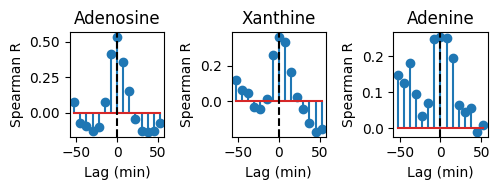

In [21]:
# plot cross correlogram of xhantine, adenosine, and adenine with behavior
plt.figure(figsize=(5, 2))
plt.subplot(131)
adenosine_idx = common_comps.index('Adenosine')
plot_ccf(adenosine_idx)
plt.subplot(132)
xanthine_idx = common_comps.index('Xanthine')
plot_ccf(xanthine_idx)
plt.subplot(133)
adenine_idx = common_comps.index('Adenine')
plot_ccf(adenine_idx)
plt.tight_layout()
# # plt.savefig('purines_speed_ccf.pdf', dpi=300)
plt.show()

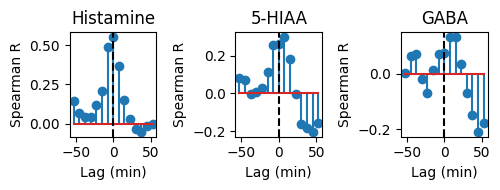

In [22]:
# plot cross_corr of serotonin, histamine, and 5hiaa 
plt.figure(figsize=(5, 2))
plt.subplot(131)
serotonin_idx = common_comps.index('Histamine')
plot_ccf(serotonin_idx)
plt.subplot(132)
histamine_idx = common_comps.index('5-Hydroxyindoleacetic acid')
plot_ccf(histamine_idx)
plt.title('5-HIAA')
plt.subplot(133)
five_hiaa_idx = common_comps.index('gamma-Aminobutyric acid')
plot_ccf(five_hiaa_idx)
plt.title('GABA')
plt.tight_layout()
# # plt.savefig('histamine_5hiaa_gaba_ccf.pdf', dpi=300)
plt.show()

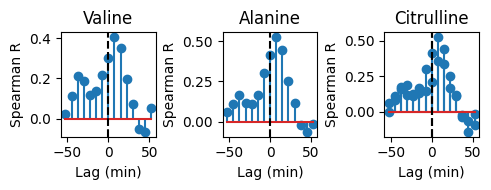

In [23]:
# plot cross corr for valine, alanine, citrulline
plt.figure(figsize=(5, 2))
plt.subplot(131)
valine_idx = common_comps.index('Valine')
plot_ccf(valine_idx)
plt.subplot(132)
isoleucine_idx = common_comps.index('Alanine')
plot_ccf(isoleucine_idx)
plt.subplot(133)
alanine_idx = common_comps.index('Alanine')
plot_ccf(alanine_idx)
plt.subplot(133)
citrulline_idx = common_comps.index('Citrulline')
plot_ccf(citrulline_idx)
plt.tight_layout()
# # plt.savefig('val_ala_cit_ccf.pdf', dpi=300)
plt.show()

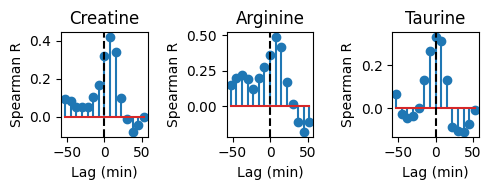

In [24]:
# creatine, arginine, and taurine
plt.figure(figsize=(5, 2))
plt.subplot(131)
creatine_idx = common_comps.index('Creatine')
plot_ccf(creatine_idx)
plt.subplot(132)
arginine_idx = common_comps.index('Arginine')
plot_ccf(arginine_idx)
plt.subplot(133)
taurine_idx = common_comps.index('Taurine')
plot_ccf(taurine_idx)
plt.tight_layout()
# # plt.savefig('creatine_arginine_taurine_ccf.pdf', dpi=300)
plt.show()

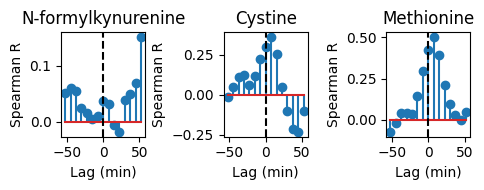

In [25]:
# n formyl kynurenine, cystine, methionine
plt.figure(figsize=(5, 2))
plt.subplot(131)
nformylkynurenine_idx = common_comps.index('N-formylkynurenine')
plot_ccf(nformylkynurenine_idx)
plt.subplot(132)
cystine_idx = common_comps.index('Cystine')
plot_ccf(cystine_idx)
plt.subplot(133)
methionine_idx = common_comps.index('Methionine')
plot_ccf(methionine_idx)
plt.tight_layout()
# # plt.savefig('nformylkynurenine_cystine_methionine_ccf.pdf', dpi=300)
plt.show()

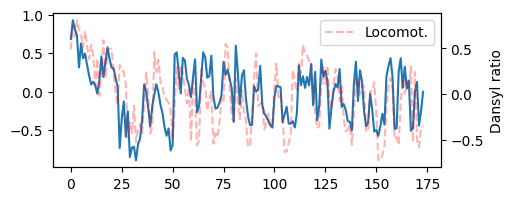

<Figure size 640x480 with 0 Axes>

In [26]:
plt.figure(figsize=(5, 2))
histamine_idx = common_comps.index('Histamine')
plt.plot(X[:, histamine_idx], label='Histamine')
plt.twinx()
plt.plot(y,c='red',alpha=0.3, ls='--',label='Locomot.')
plt.legend()
plt.xlabel('Sample # (7.5 min)')
plt.ylabel('Dansyl ratio')
# # plt.savefig('histamine_speed.pdf', dpi=300)
plt.show()
plt.tight_layout()

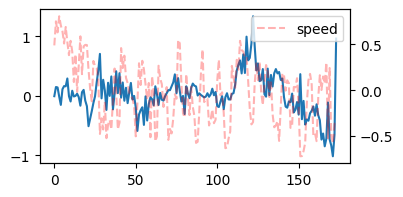

In [27]:
plt.figure(figsize=(4, 2))
kynurenine_idx = common_comps.index('Kynurenine')
plt.plot(X[:, kynurenine_idx], label='Kynurenine')
plt.twinx()
plt.plot(y, c='red', alpha=0.3, ls='--', label='speed')
plt.legend()

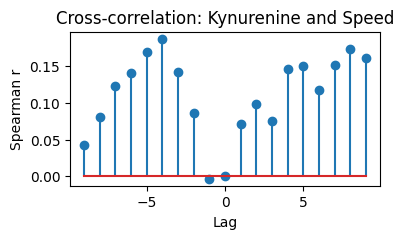

In [28]:
# plot cross correlation of kynurenine and speed
lags, ccf = spearman_ccf(X[:, kynurenine_idx], y, max_lag=10)
plt.figure(figsize=(4, 2))
plt.stem(lags, ccf)
plt.xlabel('Lag')
plt.ylabel('Spearman r')
plt.title('Cross-correlation: Kynurenine and Speed')
# # plt.savefig('kynurenine_speed_ccf.pdf', dpi=300)
plt.show()

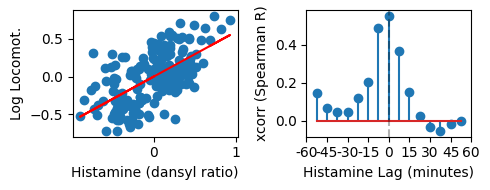

In [29]:

plt.figure(figsize=(5, 2))
plt.subplot(121)
plt.scatter(X[:, histamine_idx], y)
# add regression line
m, b = np.polyfit(X[:, histamine_idx], y, 1)
plt.plot(X[:, histamine_idx], m*X[:, histamine_idx] + b, color='red')
plt.xlabel('Histamine (dansyl ratio)')
plt.ylabel('Log Locomot.')

plt.subplot(122)
# plt.xcorr(np.log(X[:, histamine_idx]), np.log(y),maxlags=8)
lags, rs = spearman_ccf(X[:, histamine_idx], y, max_lag=8)
plt.stem(lags, rs)
plt.axvline(0, color='k', linestyle='--',alpha=0.3)
plt.xticks(np.arange(-8, 9, 2), labels=(np.arange(-8, 9, 2)*7.5).astype(int))   
plt.xlabel('Histamine Lag (minutes)')
plt.ylabel('xcorr (Spearman R)')
plt.tight_layout()
# # plt.savefig('histamine_lagged_corr.pdf', dpi=300)

Correlation between Creatine and Behavior: r=0.319, p=1.812e-05


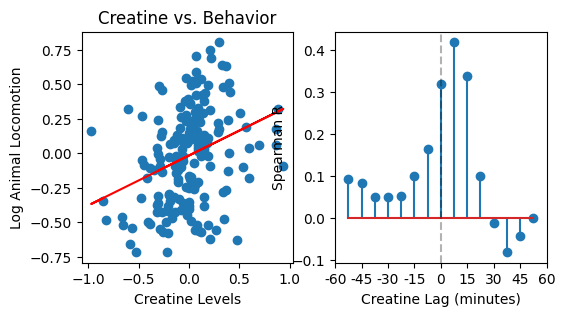

In [30]:
# scatter creatine and behavior
creatine_idx = common_comps.index('Creatine')
r, p = pearsonr(X[:, creatine_idx], y)
print(f'Correlation between Creatine and Behavior: r={r:.3f}, p={p:.3e}')
plt.figure(figsize=(6, 3))

plt.subplot(121)
plt.scatter(X[:, creatine_idx], y)
# add regression line
m, b = np.polyfit(X[:, creatine_idx], y, 1)
plt.plot(X[:, creatine_idx], m*X[:, creatine_idx] + b, color='red')
plt.xlabel('Creatine Levels')
plt.ylabel('Log Animal Locomotion')
plt.title('Creatine vs. Behavior')

plt.subplot(122)
# cross-correlation of histamine with behavior
maxlag = 8
# plt.xcorr(np.log(X[:, creatine_idx]), np.log(y), maxlags=maxlag)
lags, rs = spearman_ccf(X[:, creatine_idx], y, max_lag=8)
plt.stem(lags, rs)
plt.xticks(np.arange(-maxlag, maxlag + 1, 2), labels=(np.arange(-maxlag, maxlag + 1, 2)*7.5).astype(int))   
plt.xlabel('Creatine Lag (minutes)')
plt.ylabel('Spearman R')
plt.axvline(0, color='k', linestyle='--',alpha=0.3)
plt.show()

Correlation between Kynurenine and Behavior: r=0.036, p=6.335e-01


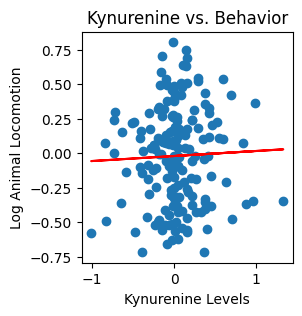

In [31]:
# kynurenine
kynurenine_idx = common_comps.index('Kynurenine')
r, p = spearmanr(X[:, kynurenine_idx], y)
print(f'Correlation between Kynurenine and Behavior: r={r:.3f}, p={p:.3e}')
plt.figure(figsize=(6, 3))
plt.subplot(121)
plt.scatter(X[:, kynurenine_idx], y)
# add regression line
m, b = np.polyfit(X[:, kynurenine_idx], y, 1)
plt.plot(X[:, kynurenine_idx], m*X[:, kynurenine_idx] + b, color='red')
plt.xlabel('Kynurenine Levels')
plt.ylabel('Log Animal Locomotion')
plt.title('Kynurenine vs. Behavior')

# plt.subplot(122)
# # cross-correlation of kynurenine with behavior
# maxlag = 8
# # plt.xcorr(np.log(X[:, taurine_idx]), np.log(y), maxlags=maxlag)
# lags, rs = spearman_ccf(X[:, kynurenine_idx], y, max_lag=8)
# plt.stem(lags, rs)
# plt.xticks(np.arange(-maxlag, maxlag + 1, 2), labels=(np.arange(-maxlag, maxlag + 1, 2)*7.5).astype(int))   
# plt.xlabel('Kynurenine Lag (minutes)')
# plt.ylabel('Spearman R')
# plt.axvline(0, color='k', linestyle='--',alpha=0.3)
plt.show()

In [32]:
# compute all ccgs
all_ccgs = {}
for i, comp in enumerate(common_comps):
    lags, rs = spearman_ccf(X[:, i], y, max_lag=8)
    all_ccgs[comp] = (lags, rs)

In [33]:
common_comps

['(2R,4S)-2,4-Diaminopentanoic acid',
 '(R)-1-Aminopropan-2-ol',
 '1,2-Dihydroxynaphthalene-6-sulfonic acid',
 '1-Aminocyclopropane-1-carboxylic acid',
 '1-Methylhistidine',
 '2,6-Dihydroxypyridine',
 '2,8-Dihydroxyadenine',
 '2-Amino-4-chloro-4-pentenoic acid',
 '2-Aminobutyric acid/2-Aminoisobutyric acid/3-Aminoisobutyric acid',
 '2-Aminooctanoic acid',
 '2-Hydroxy-cis-hex-2,4-dienoic acid',
 '2-Hydroxyethylenedicarboxylic acid',
 '2-Isopropoxyphenol',
 '3-(4-Hydroxyphenyl)lactic acid',
 '3-Amino-2-piperidone',
 '3-Aminoisobutyric acid',
 '3-Aminopropanal',
 '3-Cyano-L-alanine',
 '3-Hydroxy-L-proline',
 '3-Hydroxybenzaldehyde',
 '3-Methoxy-4-hydroxyphenylacetaldehyde',
 '3-Methylsalicylaldehyde',
 '3-Nitrotyrosine',
 '4,8-Dihydroxyquinoline',
 '4-Amino-2-hydroxylamino-6-nitrotoluene',
 '4-Amino-4-deoxychorismic acid',
 '4-Aminobutyraldehyde',
 '4-Chloro-L-lysine',
 '4-Cresol/3-Cresol',
 '4-Ethylphenol',
 '4-Guanidinobutanal',
 '4-Hydroxyaniline',
 '4-Hydroxybenzaldehyde/3-Hydroxybenz

(array([ 5.,  5., 12.,  9.,  0.,  1., 17., 34., 42., 30.]),
 array([-0.57302522, -0.45769379, -0.34236235, -0.22703091, -0.11169948,
         0.00363196,  0.1189634 ,  0.23429483,  0.34962627,  0.46495771,
         0.58028914]),
 <BarContainer object of 10 artists>)

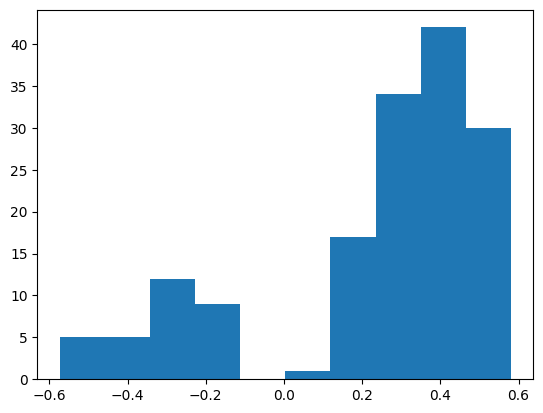

In [34]:
plt.hist([all_ccgs[c][1][np.argmax(np.abs(all_ccgs[c][1]))] for c in common_comps])

In [35]:
np.sum([all_ccgs[c][1][np.argmax(np.abs(all_ccgs[c][1]))] <-0.2  for c in common_comps]),np.sum([all_ccgs[c][1][np.argmax(np.abs(all_ccgs[c][1]))] >0.2  for c in common_comps])

(np.int64(25), np.int64(111))

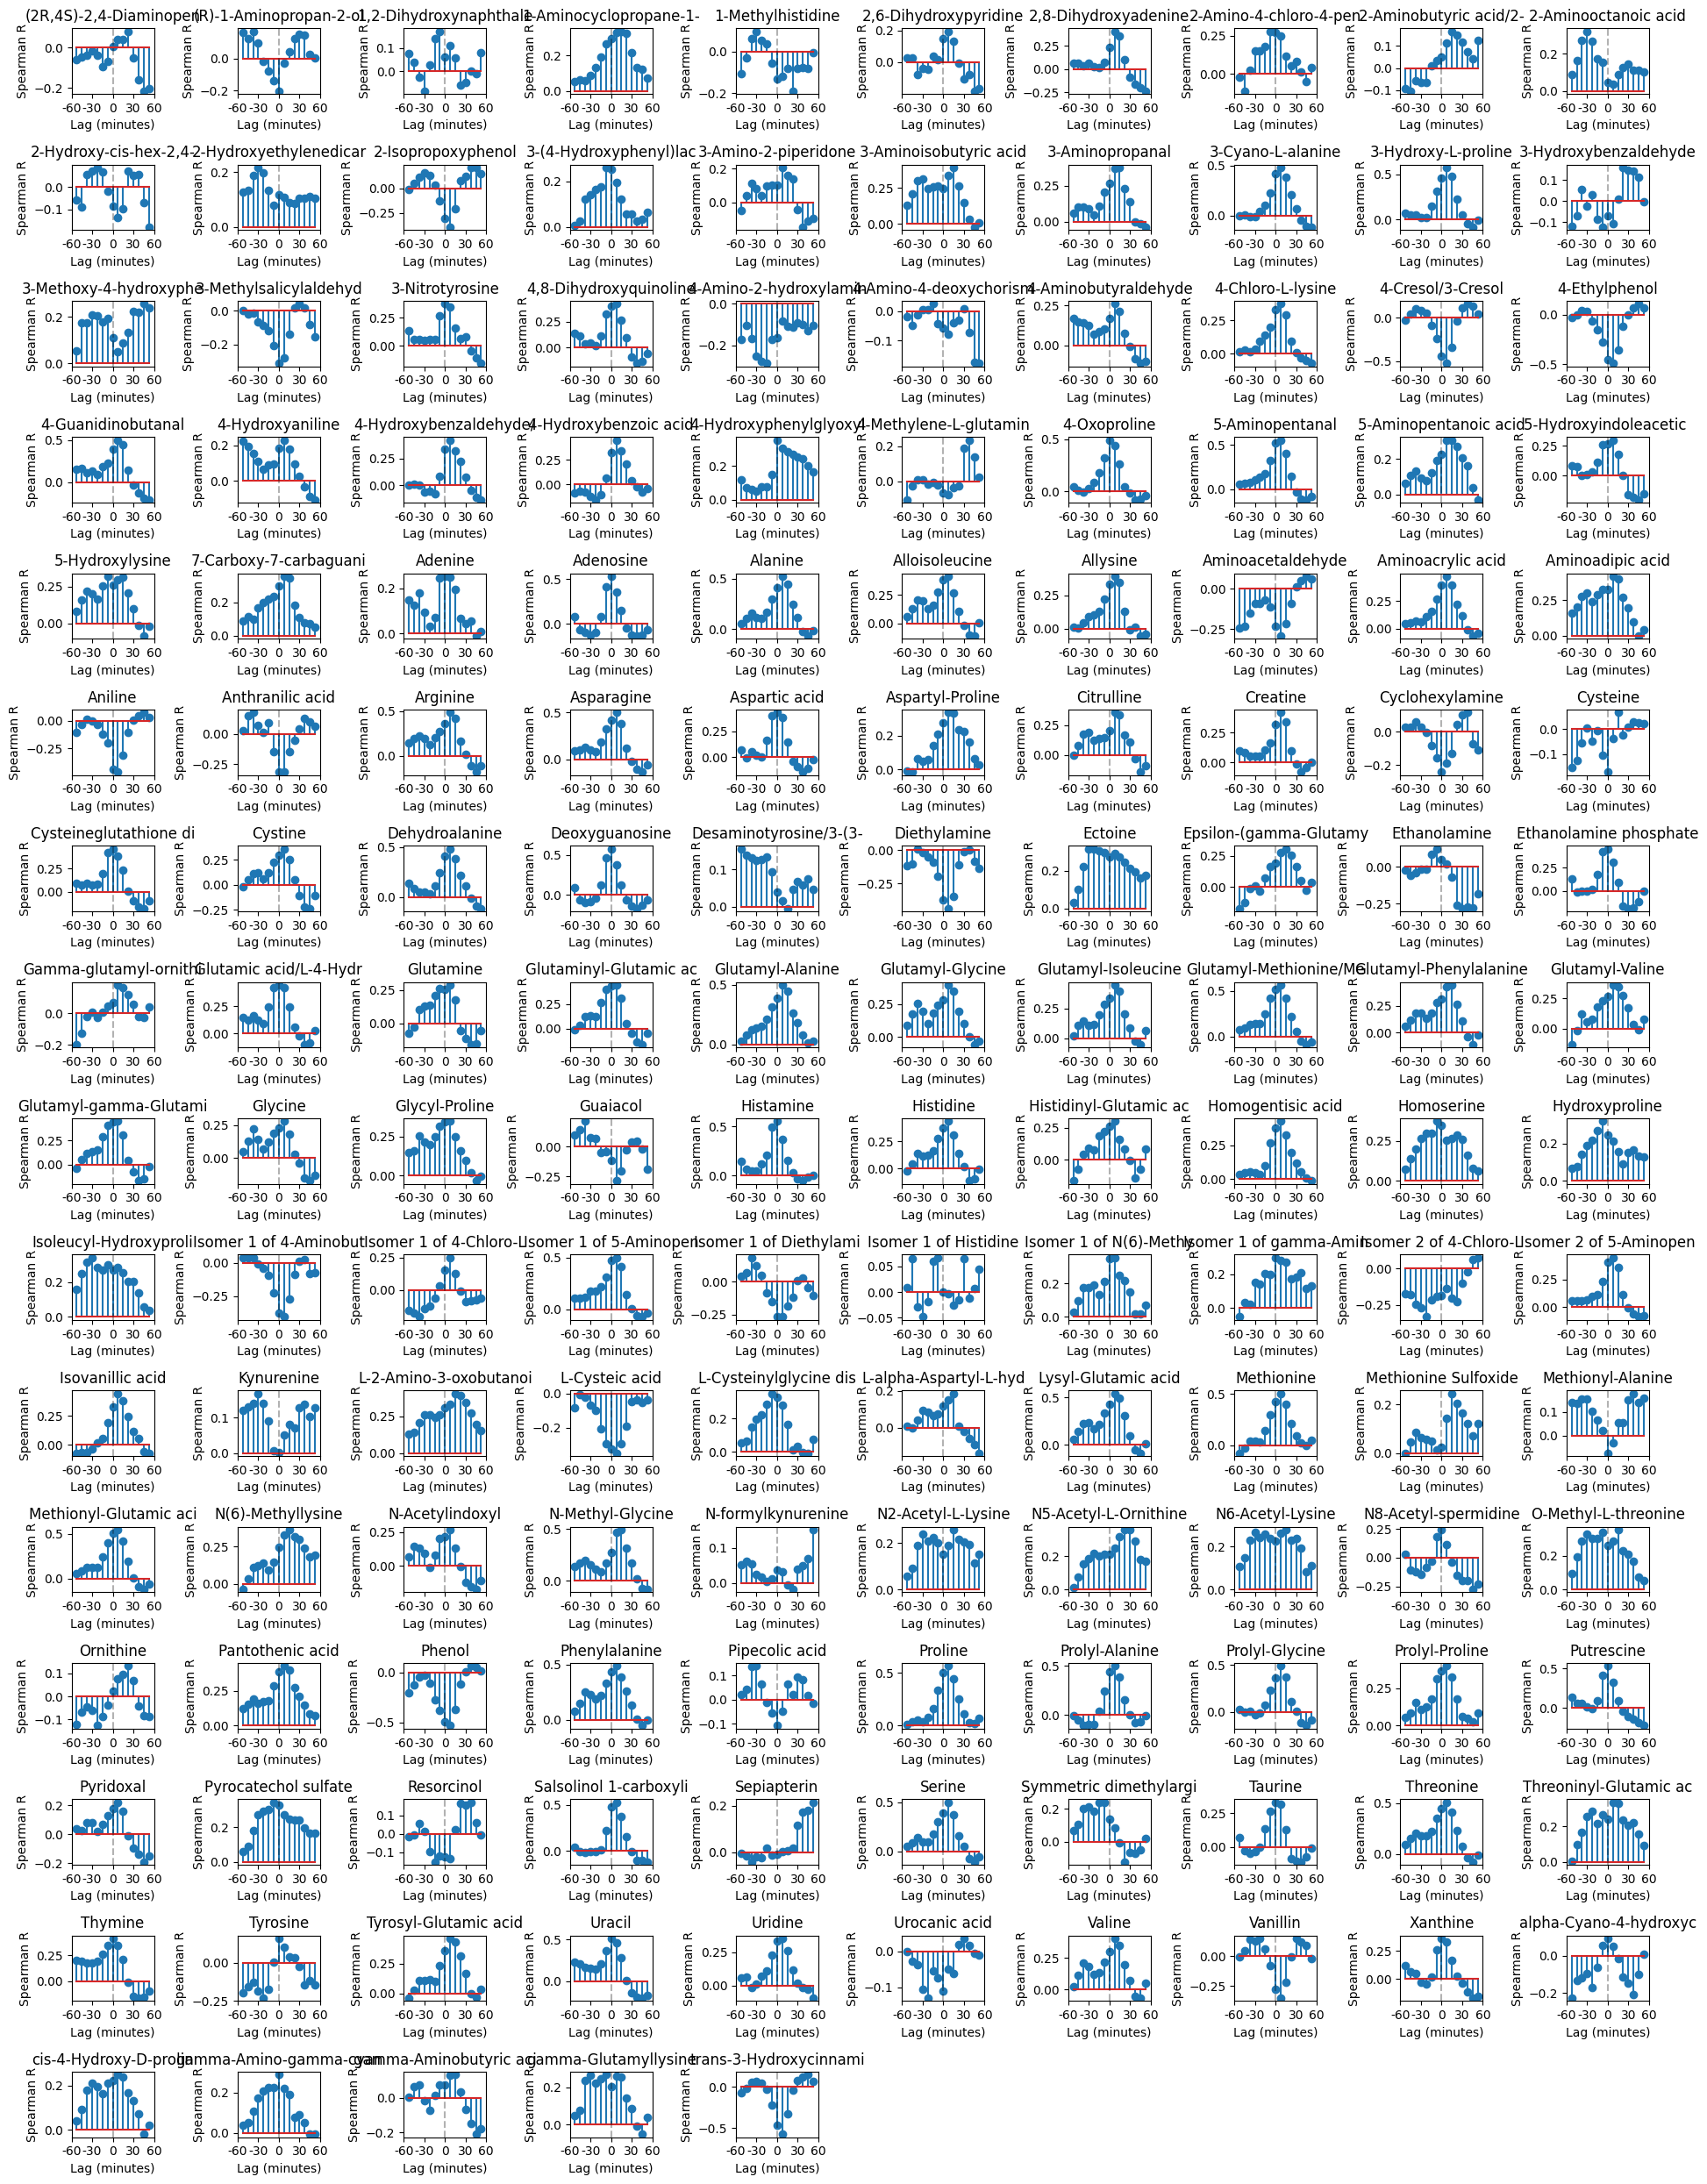

In [36]:
# plot all the spearman cross-correlations
plt.figure(figsize=(19  , 25))
for i, comp in enumerate(common_comps):
    plt.subplot(16, 10, i+1)
    lags, rs = all_ccgs[comp]
    plt.stem(lags, rs)
    plt.xticks(np.arange(-8, 9, 4), labels=(np.arange(-8, 9, 4)*7.5).astype(int))   
    plt.xlabel('Lag (minutes)')
    plt.ylabel('Spearman R')
    plt.title(comp[:22])
    plt.axvline(0, color='k', linestyle='--',alpha=0.3)
plt.tight_layout()
plt.show()

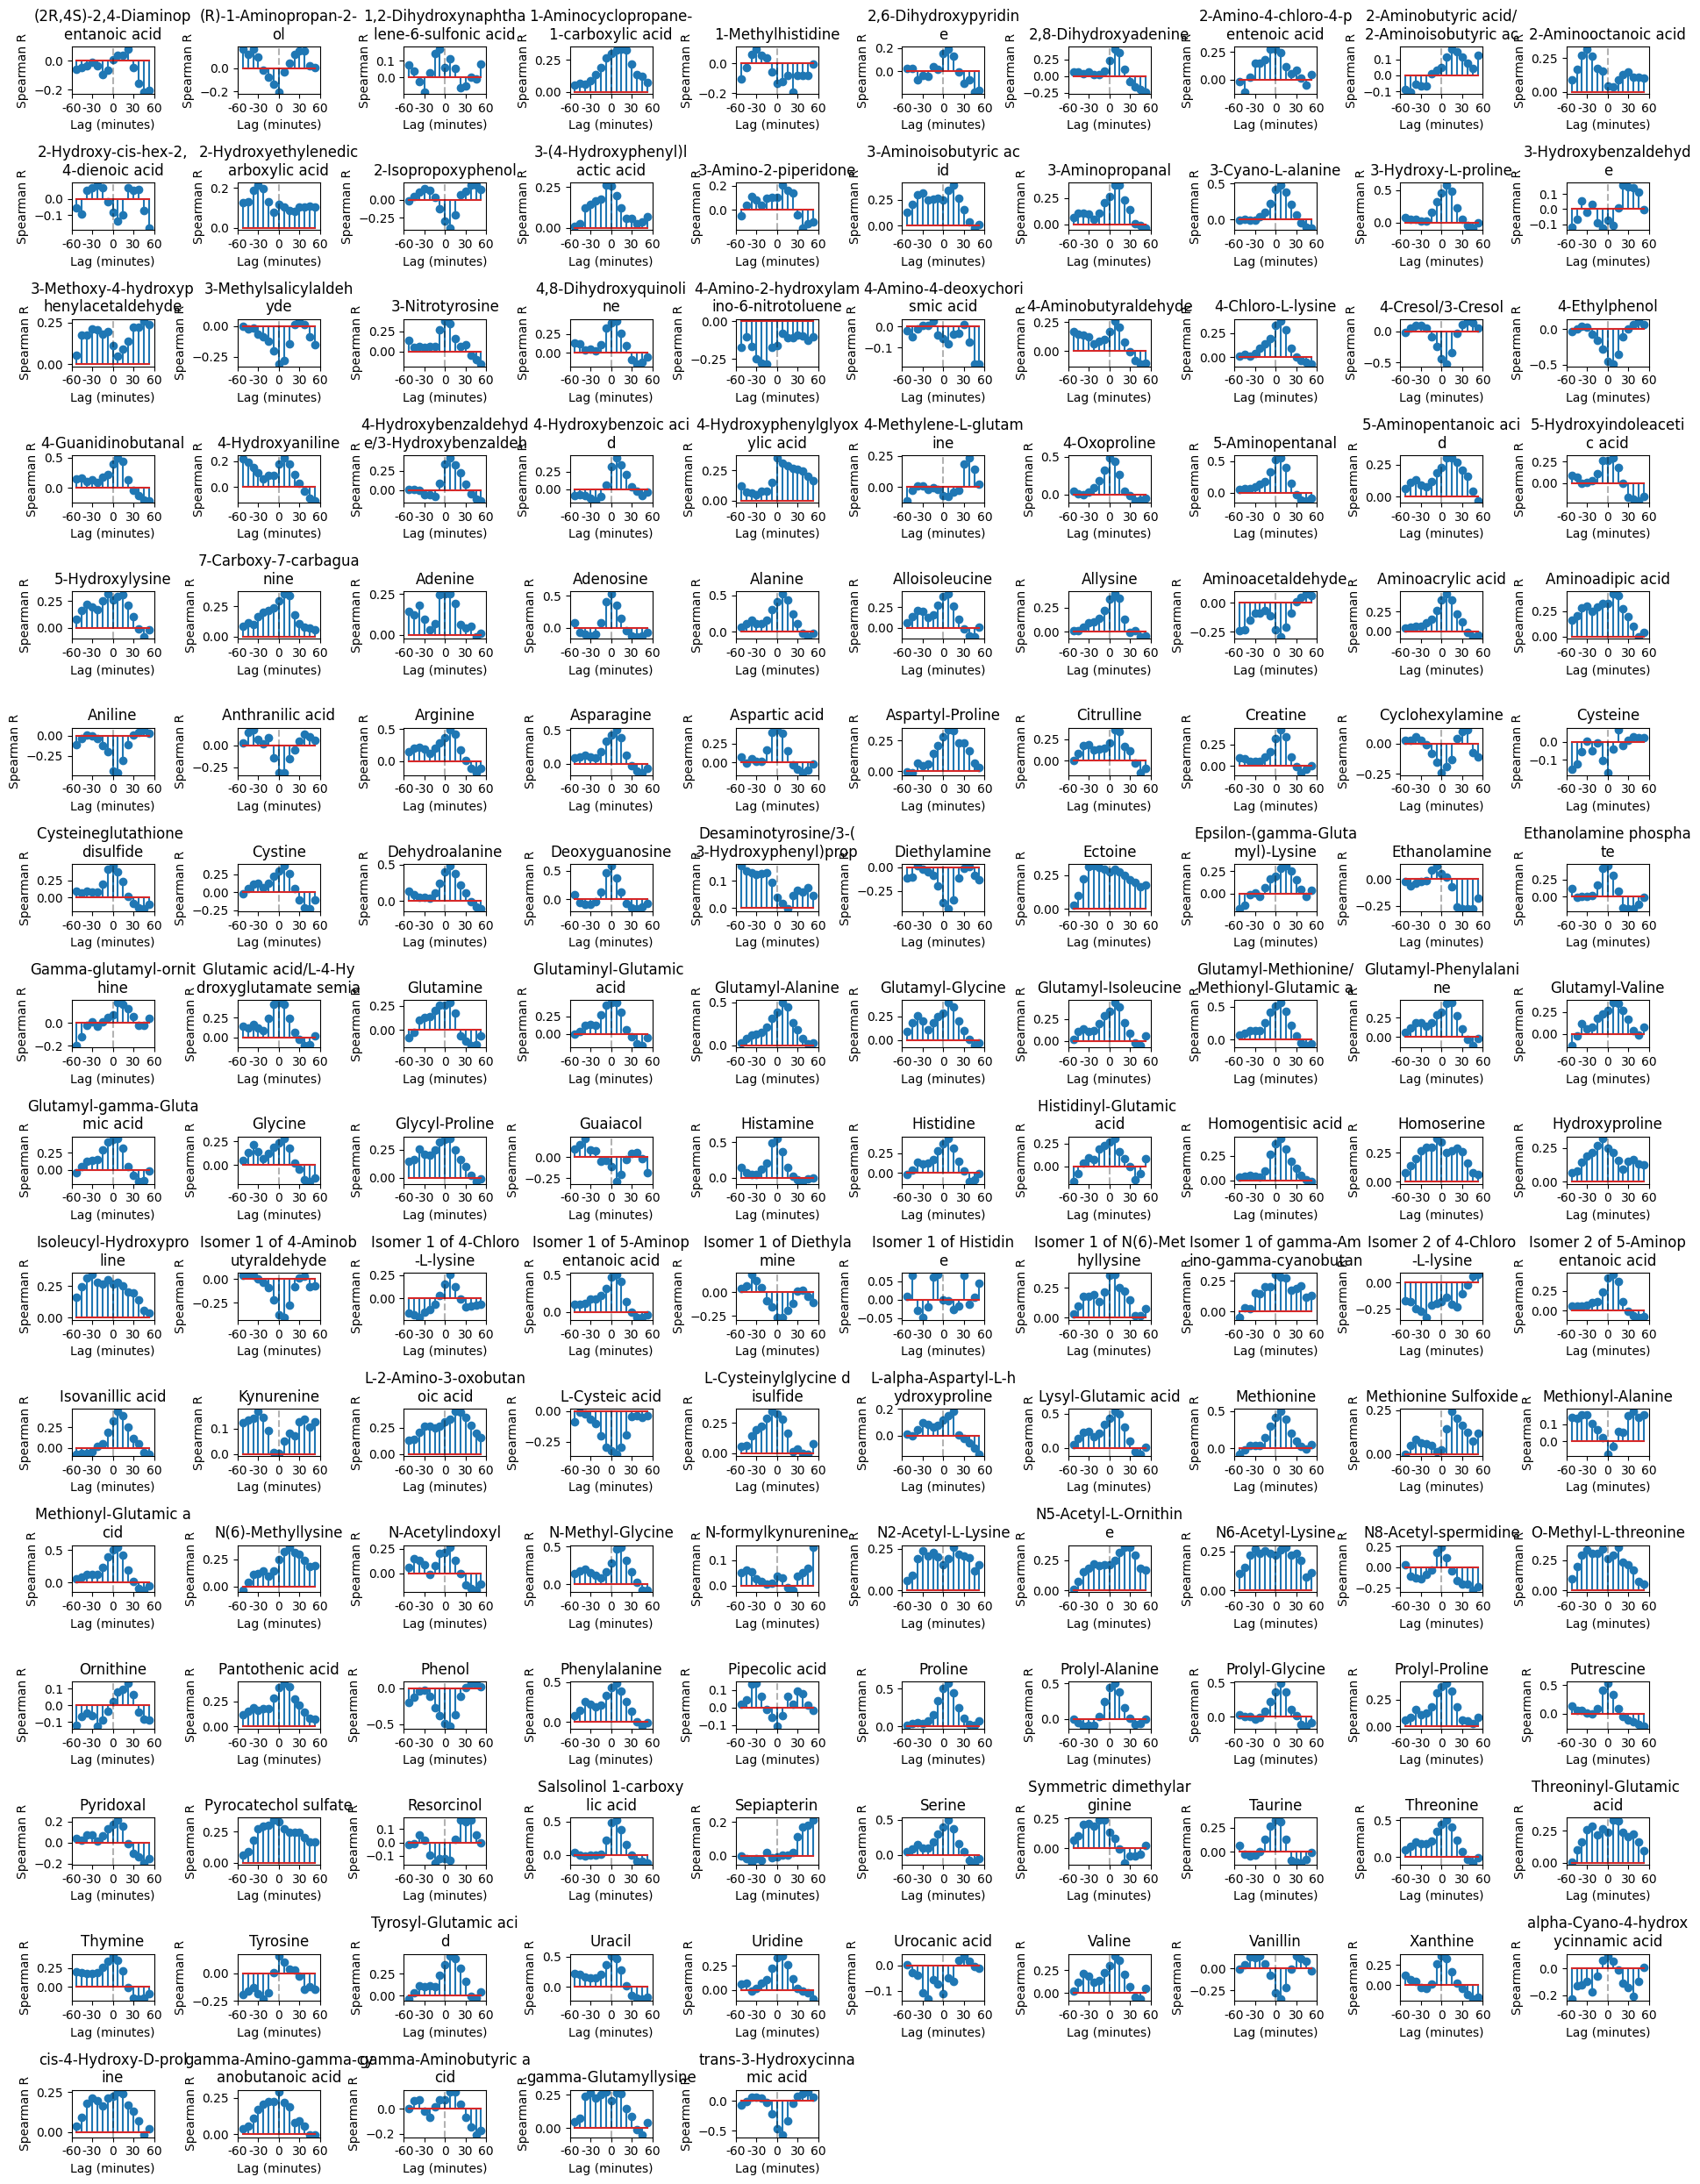

In [37]:
# plot all the spearman cross-correlations
plt.figure(figsize=(19  , 25))
for i, comp in enumerate(common_comps):
    plt.subplot(16, 10, i+1)
    lags, rs = all_ccgs[comp]
    plt.stem(lags, rs)
    plt.xticks(np.arange(-8, 9, 4), labels=(np.arange(-8, 9, 4)*7.5).astype(int))   
    plt.xlabel('Lag (minutes)')
    plt.ylabel('Spearman R')
    if len(comp) > 20:
        plt.title(comp[:20] + '\n' + comp[20:40])
    else:
        plt.title(comp)
    plt.axvline(0, color='k', linestyle='--',alpha=0.3)
plt.tight_layout()
# # plt.savefig('all_compound_speed_ccf.svg',dpi=300)
plt.show()

# run vs sleep hormones

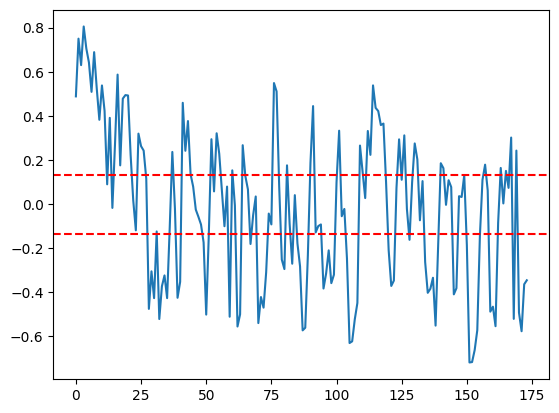

In [38]:
plt.plot(y)
y_med = np.median(y)
y_abd = np.median(np.abs(y - y_med))
plt.axhline(y_med - y_abd/2, color='r', linestyle='--')
plt.axhline(y_med + y_abd/2, color='r', linestyle='--')

In [39]:
from scipy.ndimage import label

In [40]:
# take periods where y is above median for more than one lag
above_med = y > y_med
# find contiguous regions where above_med is True
labeled, n_labels = label(above_med)
# find lengths of each labeled region
lengths = np.bincount(labeled)[1:]  # skip background count at index 0
# find labels of regions longer than 1 lag
long_labels = np.where(lengths > 2)[0] + 1  # skip background label 0
# create mask for long regions
mask_run = np.isin(labeled, long_labels)

# take periods where y is below median for more than one lag
below_med = y < y_med - y_abd/2
# find contiguous regions where below_med is True
labeled, n_labels = label(below_med)
# find lengths of each labeled region
lengths = np.bincount(labeled)[1:]  # skip background count at index 0
# find labels of regions longer than 1 lag
long_labels = np.where(lengths > 2)[0] + 1  # skip background label 0
# create mask for long regions
mask_sleep = np.isin(labeled, long_labels)

In [41]:
labeled

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0,  2,  2,
        2,  2,  0,  0,  0,  3,  3,  0,  0,  0,  0,  0,  0,  0,  0,  4,  4,
        4,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  6,  6,  0,  0,  0,  7,
        0,  0,  8,  8,  8,  8,  0,  0,  0,  0,  0,  9,  9,  0,  0, 10,  0,
       11, 11, 11, 11, 11,  0,  0,  0,  0,  0, 12, 12, 12, 12, 12,  0,  0,
        0,  0, 13, 13, 13, 13, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 14, 14, 14,  0,  0,  0,  0,  0, 15,  0,  0,  0,  0,  0, 16, 16,
       16, 16, 16, 16,  0,  0,  0,  0,  0, 17, 17,  0,  0,  0, 18, 18, 18,
       18, 18, 18,  0,  0,  0, 19, 19, 19,  0,  0,  0,  0,  0,  0, 20,  0,
       21, 21, 21, 21], dtype=int32)

In [42]:
long_labels

array([ 1,  2,  4,  8, 11, 12, 13, 14, 16, 18, 19, 21])

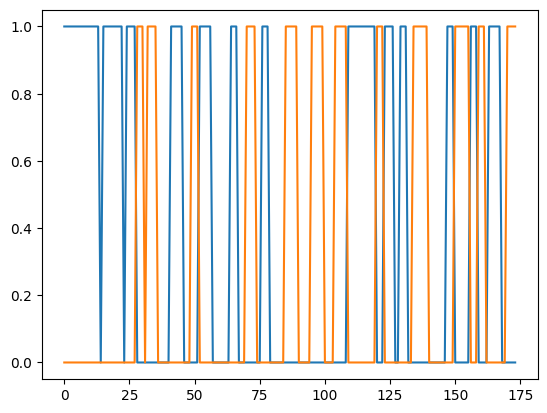

In [43]:
plt.plot(mask_run)
plt.plot(mask_sleep)

Text(0.5, 1.0, 'Metabolite Levels: Running vs. Sleep')

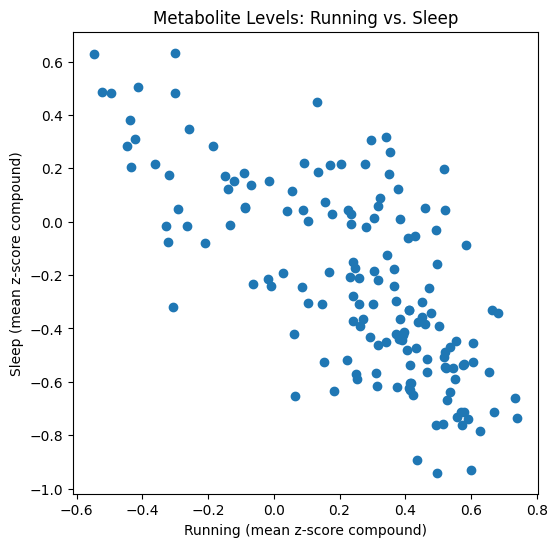

In [44]:
# zscore each row of X
X_z = (X - X.mean(axis=0)) / X.std(axis=0)
X_run = X_z[mask_run]
X_sleep = X_z[mask_sleep]
X_run_mean = np.median(X_run, axis=0)
X_sleep_mean = np.median(X_sleep, axis=0)
# plot run vs sleep means
plt.figure(figsize=(6, 6))
plt.scatter(X_run_mean, X_sleep_mean)
plt.xlabel('Running (mean z-score compound)')
plt.ylabel('Sleep (mean z-score compound)')
plt.title('Metabolite Levels: Running vs. Sleep')
# plt.savefig('run_vs_sleep_metabolites.svg', dpi=300)

In [45]:
# extract the 20 ones that are highest in run and lowest in sleep
diff = X_run_mean - X_sleep_mean
top5_run = np.argsort(diff)[-20:]
top5_sleep = np.argsort(diff)[:20]
# plot compound names (reverse order)
np.array(common_comps)[top5_run][::-1], np.array(common_comps)[top5_sleep][::-1]

(array(['Histamine', '5-Aminopentanal', 'Deoxyguanosine',
        '3-Hydroxy-L-proline',
        'Glutamyl-Methionine/Methionyl-Glutamic acid', 'Proline',
        'Salsolinol 1-carboxylic acid', 'Homogentisic acid',
        'Isovanillic acid', 'Uracil', '4-Guanidinobutanal',
        'Isomer 2 of 5-Aminopentanoic acid',
        'Cysteineglutathione disulfide', 'Arginine',
        'Methionyl-Glutamic acid', 'Asparagine', 'Prolyl-Alanine',
        'Threonine', 'Alanine', 'Lysyl-Glutamic acid'], dtype='<U65'),
 array(['Guaiacol', 'Sepiapterin', 'Aminoacetaldehyde', 'Phenol',
        '1-Methylhistidine', 'Urocanic acid', 'Vanillin',
        'Isomer 2 of 4-Chloro-L-lysine', 'Cyclohexylamine',
        'L-Cysteic acid', 'Isomer 1 of 4-Aminobutyraldehyde',
        'Diethylamine', '3-Methylsalicylaldehyde', 'Anthranilic acid',
        'Isomer 1 of Diethylamine', '4-Ethylphenol', '2-Isopropoxyphenol',
        '4-Cresol/3-Cresol', 'Aniline', 'trans-3-Hydroxycinnamic acid'],
       dtype='<U65'))